OBJECTIVE:The Goal is to predict the average flight fare using the provided input variables and a multi-linear regression model.

### Q1.Reading Source File and Checking Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the file
data=pd.read_csv("http://www.stat.ufl.edu/~winner/data/airq402.dat",sep='\s+', engine = 'python', header = None)

In [3]:
# Adding column name
data.columns = ['City1', 'City2', 'Average Flight Fare', 'Distance','Average Weekly Passengers',
                'Market Leading Airline (MLA)','Market Share MLA', 'Average MLA Fare', 
                'Low Price Airline (LPA)', 'Market Share LPA', 'Average LPA Fare']

In [4]:
data.head()

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### Q2.Check the few sample, shape, info of the data

In [5]:
df=data.copy()

In [6]:
df.sample(5)

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
144,BWI,MSY,142.22,998,540.54,WN,46.55,153.46,US,11.36,131.22
589,IAH,BNA,141.06,670,555.86,WN,63.33,134.31,WN,63.33,134.31
471,DSM,LGA,161.86,1038,203.15,CO,26.96,173.53,NW,10.91,149.76
91,ATL,IAD,156.32,547,2558.47,DL,74.26,168.36,FL,13.30,117.23
18,ABQ,MSP,181.99,981,187.28,NW,65.00,182.27,CO,2.37,109.14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City1                         1000 non-null   object 
 1   City2                         1000 non-null   object 
 2   Average Flight Fare           1000 non-null   float64
 3   Distance                      1000 non-null   int64  
 4   Average Weekly Passengers     1000 non-null   float64
 5   Market Leading Airline (MLA)  1000 non-null   object 
 6   Market Share MLA              1000 non-null   float64
 7   Average MLA Fare              1000 non-null   float64
 8   Low Price Airline (LPA)       1000 non-null   object 
 9   Market Share LPA              1000 non-null   float64
 10  Average LPA Fare              1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [8]:
print(f'Shape of the dataframe = {df.shape}')

Shape of the dataframe = (1000, 11)


### Q3.Data Cleaning

In [9]:
# Checking duplicated records
len(df[df.duplicated()])

0

In [10]:
# Checking null values
df.isnull().sum()

City1                           0
City2                           0
Average Flight Fare             0
Distance                        0
Average Weekly Passengers       0
Market Leading Airline (MLA)    0
Market Share MLA                0
Average MLA Fare                0
Low Price Airline (LPA)         0
Market Share LPA                0
Average LPA Fare                0
dtype: int64

In [11]:
# Checking datatypes of each column
df.dtypes

City1                            object
City2                            object
Average Flight Fare             float64
Distance                          int64
Average Weekly Passengers       float64
Market Leading Airline (MLA)     object
Market Share MLA                float64
Average MLA Fare                float64
Low Price Airline (LPA)          object
Market Share LPA                float64
Average LPA Fare                float64
dtype: object

In [12]:
# Checking basic details
df.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


### Q4.Exploratory Data Analysis

4.1 Univariant Analysis

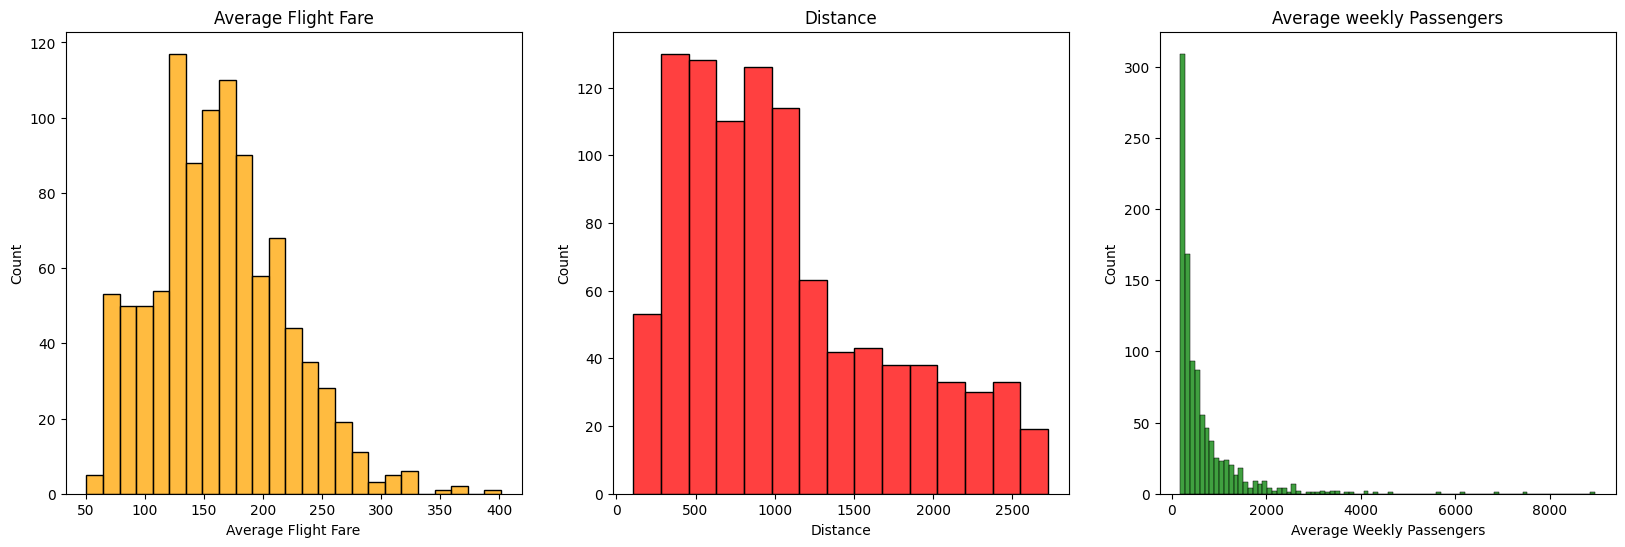

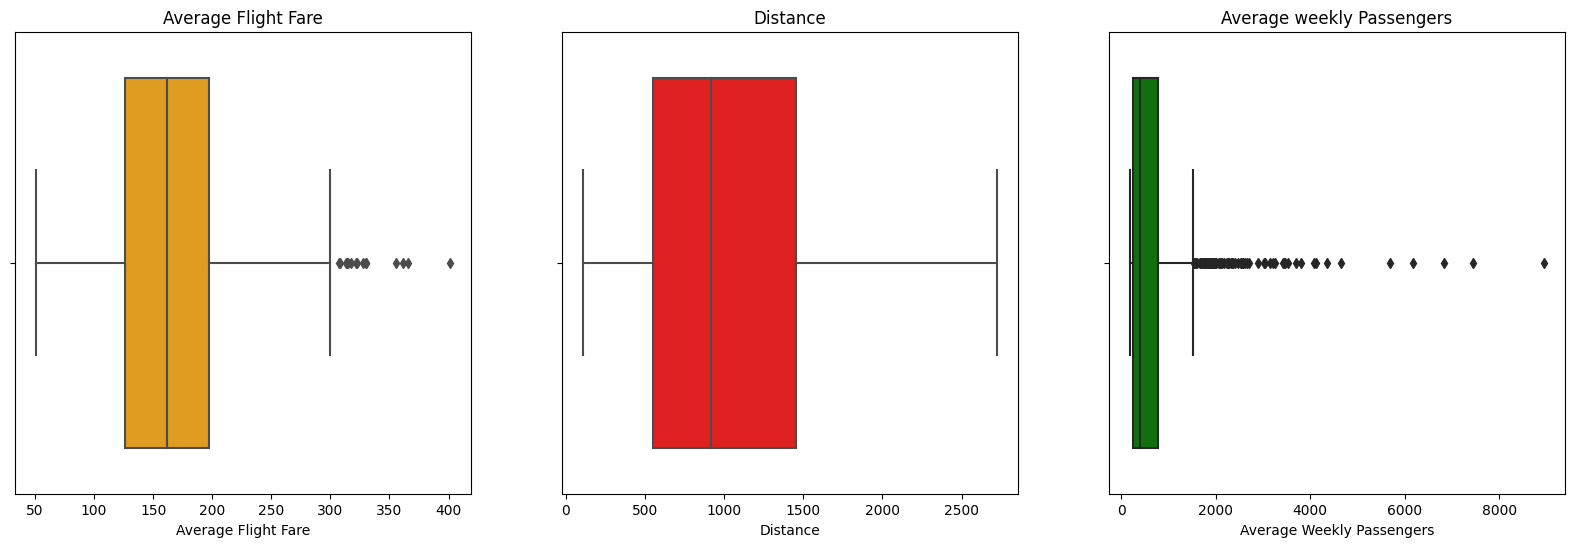

In [13]:
# Univariant Analysis
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Average Flight Fare')
sns.histplot(data=df,x='Average Flight Fare',color='orange');
# subplot2
plt.subplot(1,3,2)
plt.title('Distance')
sns.histplot(data=df,x='Distance',color='red');
# subplot3
plt.subplot(1,3,3)
plt.title('Average weekly Passengers')
sns.histplot(data=df,x='Average Weekly Passengers',color='green');

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Average Flight Fare')
sns.boxplot(data=df,x='Average Flight Fare',color='orange');
# subplot2
plt.subplot(1,3,2)
plt.title('Distance')
sns.boxplot(data=df,x='Distance',color='red');
# subplot3
plt.subplot(1,3,3)
plt.title('Average weekly Passengers')
sns.boxplot(data=df,x='Average Weekly Passengers',color='green');

# Inference:
    -> The majority of Flight Fare within the range of 100-300
    -> The average distance between the range of 0 to 2500
    -> Genarally,the average Weekly Passenger number is below 2000,the numerous outliers exists.

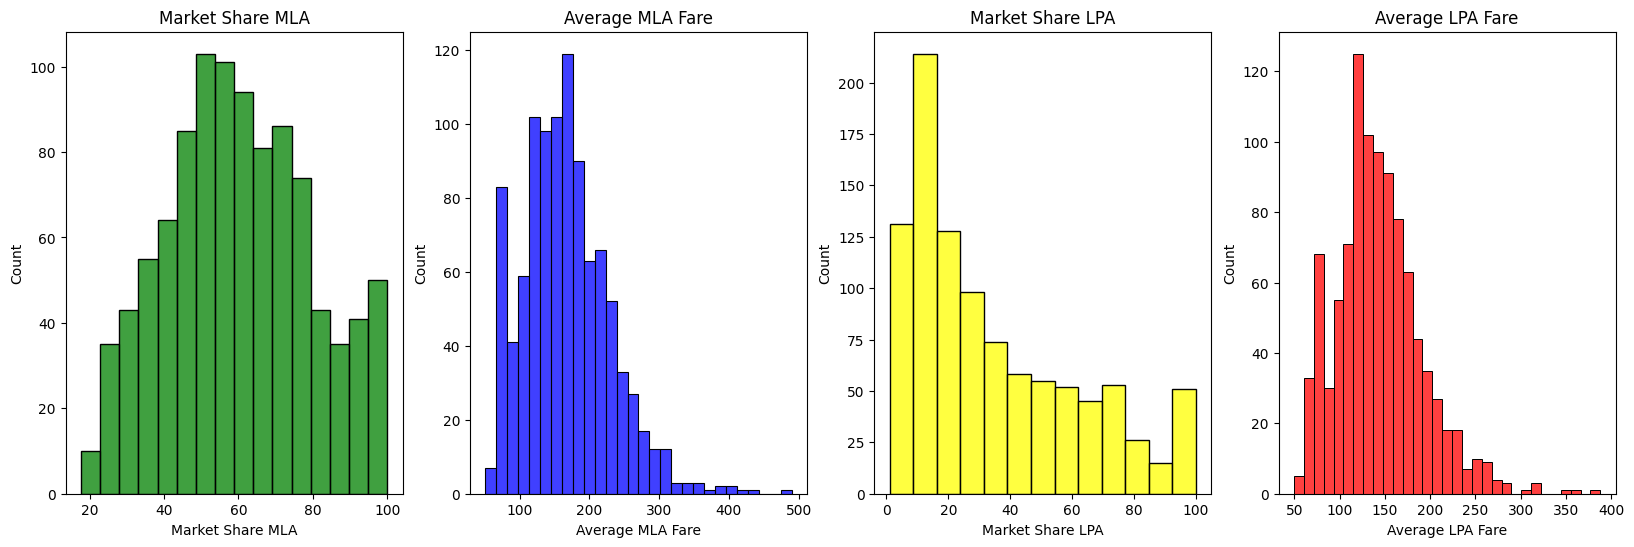

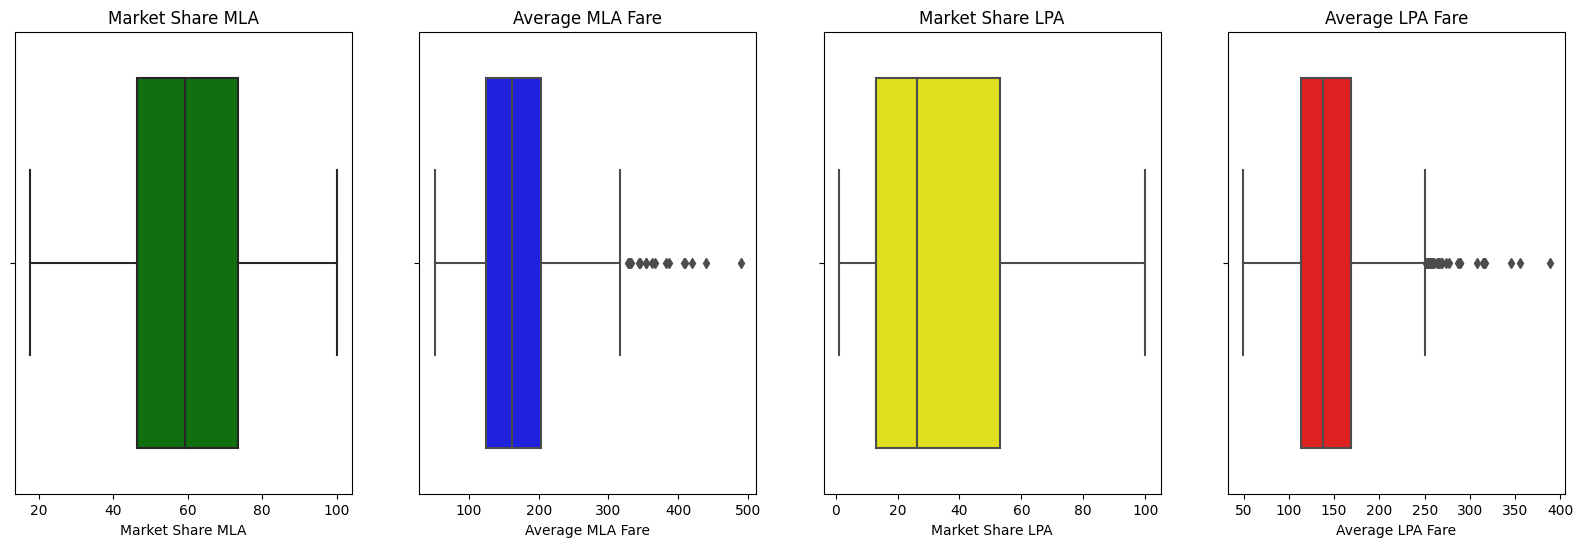

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.histplot(data = data, x = 'Market Share MLA', color = 'green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.histplot(data = data, x = 'Average MLA Fare', color = 'blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.histplot(data = data, x = 'Market Share LPA', color = 'yellow')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.histplot(data = data, x = 'Average LPA Fare', color ='red')


plt.figure(figsize = (20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.boxplot(data = data, x = 'Market Share MLA', color = 'green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.boxplot(data = data, x = 'Average MLA Fare', color ='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.boxplot(data = data, x = 'Market Share LPA', color ='yellow')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.boxplot(data = data, x = 'Average LPA Fare', color ='red')
plt.show()

<Axes: xlabel='Low Price Airline (LPA)', ylabel='Count'>

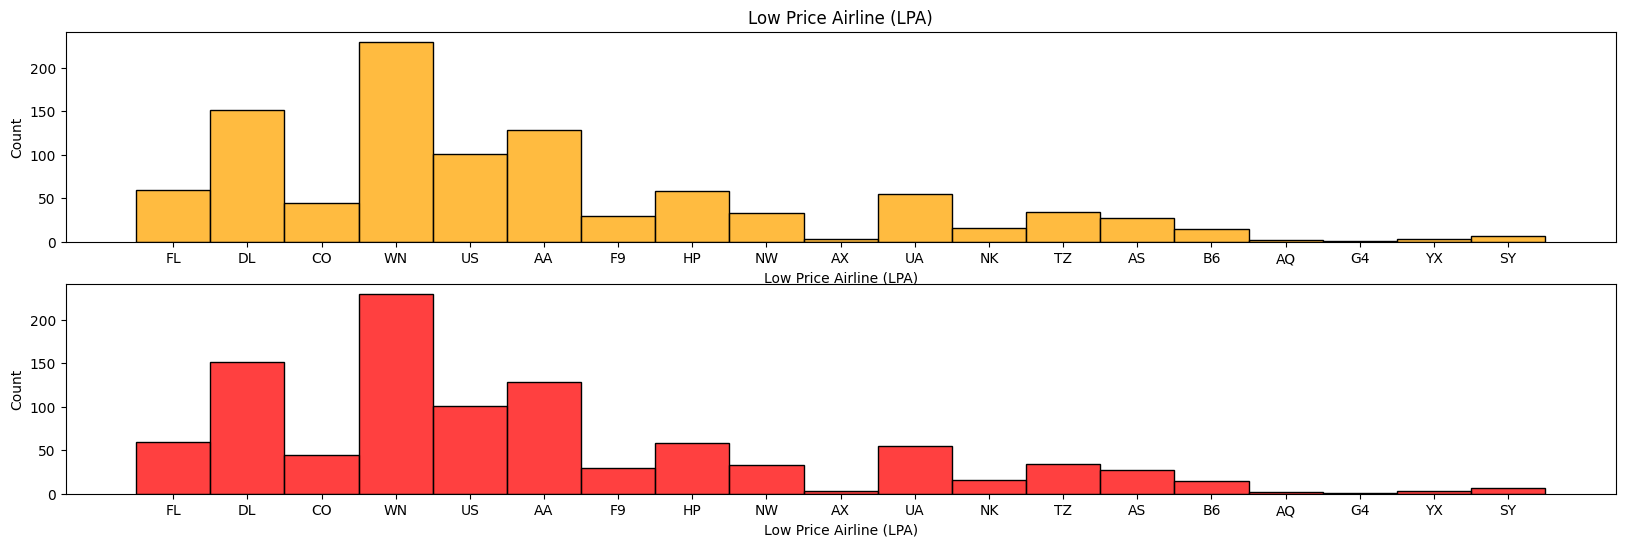

In [15]:
# subplot 3
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
plt.title('Low Price Airline (LPA)')
sns.histplot(data = data, x = 'Low Price Airline (LPA)', color = 'orange')
plt.subplot(2,1,2)
sns.histplot(data = data, x = 'Low Price Airline (LPA)', color = 'red')

# Inference:
    -> The mean fare for both the market leader and the low price Airline varies
    between 100 and 300, featuring a few exception.
    -> The market Leader captures a market share of 40 to 80 percent on the majority, while
    the Low Price Airline holds less than 40 percent market share on most routes.
    

In [16]:
df.columns

Index(['City1', 'City2', 'Average Flight Fare', 'Distance',
       'Average Weekly Passengers', 'Market Leading Airline (MLA)',
       'Market Share MLA', 'Average MLA Fare', 'Low Price Airline (LPA)',
       'Market Share LPA', 'Average LPA Fare'],
      dtype='object')

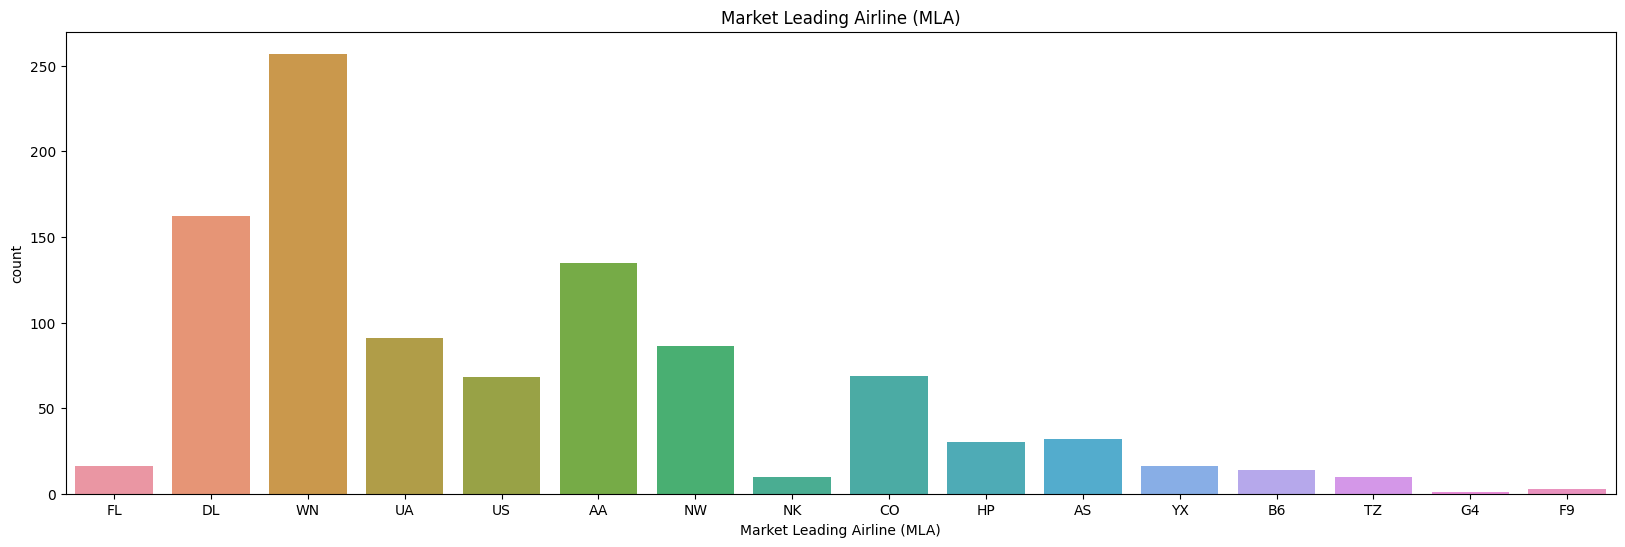

In [17]:
plt.figure(figsize=(20,6))
plt.title('Market Leading Airline (MLA)')
sns.countplot(data=df,x="Market Leading Airline (MLA)")
plt.show()

 - WN and DL happens to be market leader airline on most of the routes.

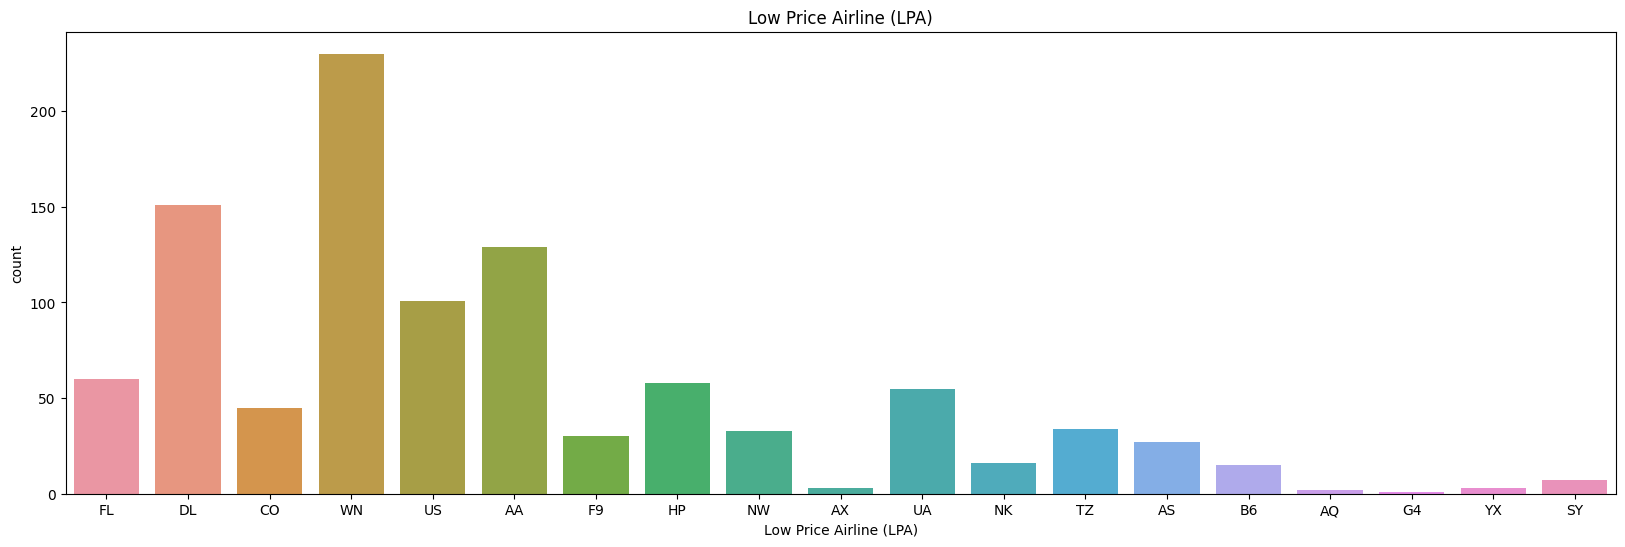

In [18]:
plt.figure(figsize=(20,6))
plt.title('Low Price Airline (LPA)')
sns.countplot(data=df,x="Low Price Airline (LPA)")
plt.show()

- WN followed DL happens to be the low price airline on most routes

4.2 Bivariant Analysis

In [19]:
numcols=df.select_dtypes(exclude='O')
numcols.corr()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
Average Flight Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average Weekly Passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
Market Share MLA,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average MLA Fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
Market Share LPA,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
Average LPA Fare,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


- Average Flight Fare is most correlated to fare of market leader and low performing flight

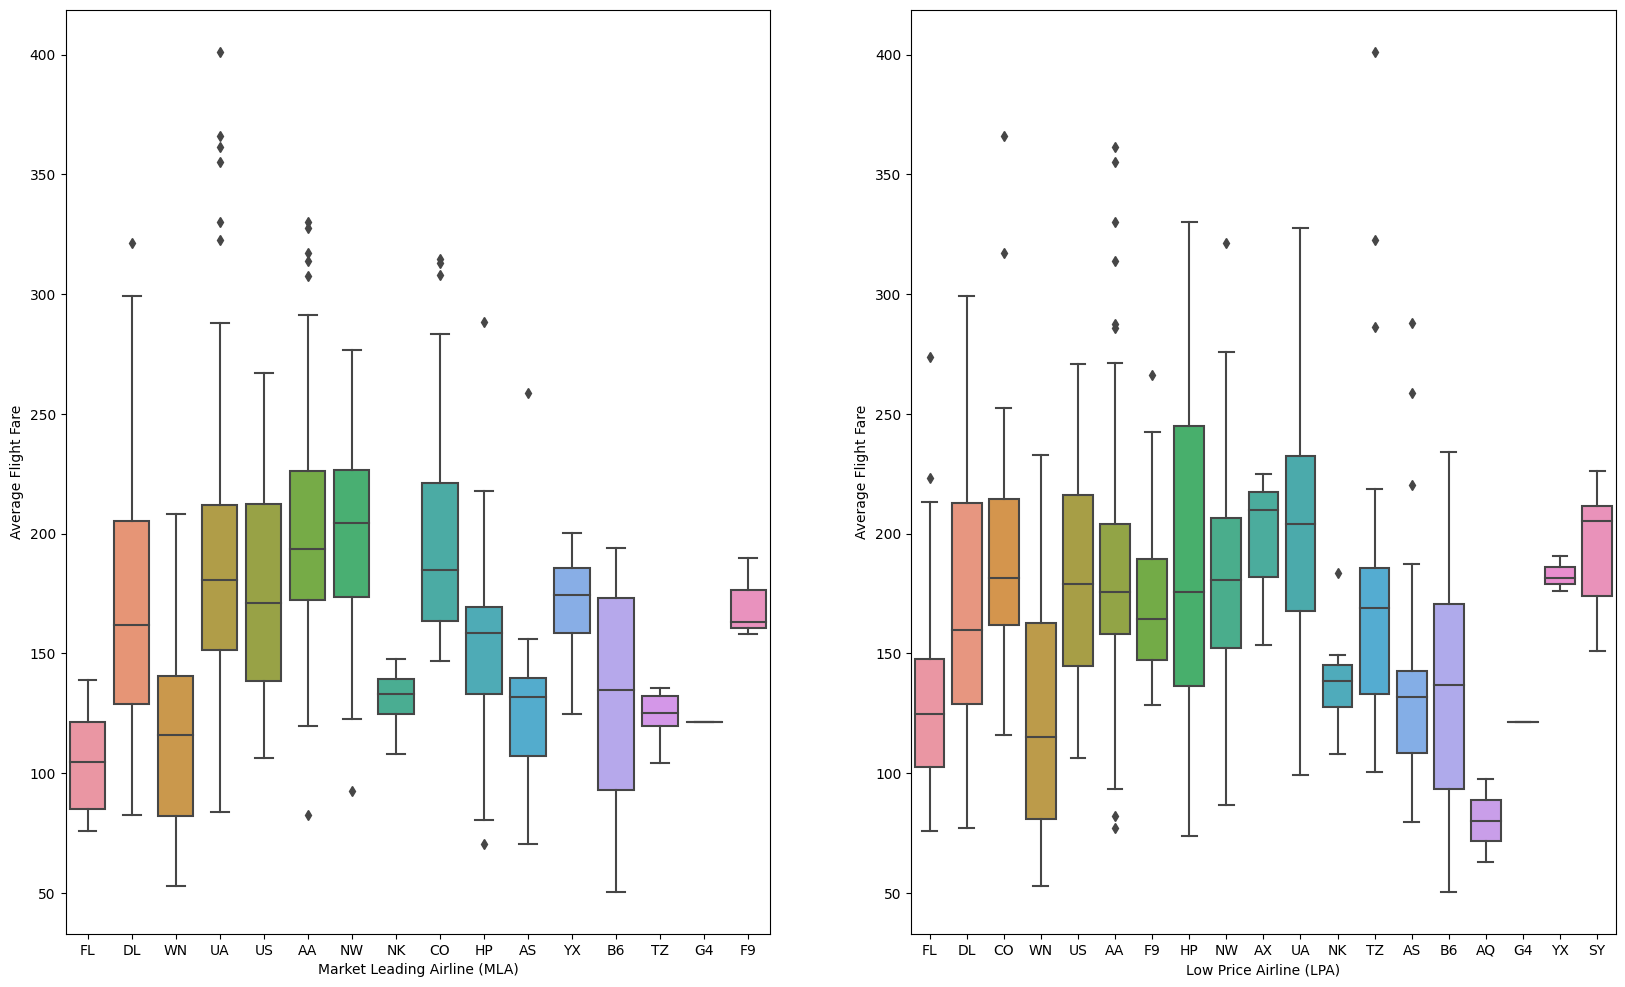

In [20]:
# let is check with conditional boxplot to understand the relation better
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Market Leading Airline (MLA)',y='Average Flight Fare')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Low Price Airline (LPA)',y='Average Flight Fare')
plt.show()

- Most flight have comparable median flight fare with some having very low vlues
- Flight fare of market leading airline and low Price airline seem to fall in similar range

4.3 Multivariant Plot and Scatter Plot

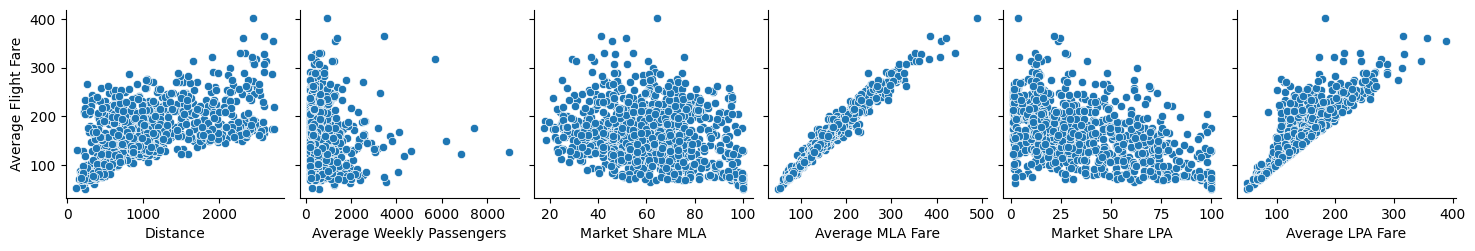

In [21]:
#Pair Plot
sns.pairplot(data=df,x_vars=["Distance", "Average Weekly Passengers",'Market Share MLA',
    
                            'Average MLA Fare','Market Share LPA','Average LPA Fare'],y_vars='Average Flight Fare')
plt.show()

- Average Flight Fare is most correlated to fare of Market leader and Low performing flight with slightly corelation with Distance as well


- Variables need to be scaled before analysis. Transformation seems unnecessary as most data points don't show any clear trend with Average Flight Fare. Still checking effect of og transformation on the data set.

In [22]:
numcols

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51
996,83.28,200,232.71,99.57,82.55,99.57,82.55
997,159.97,814,843.80,46.19,159.65,13.89,159.02
998,73.57,174,214.45,99.74,73.44,99.74,73.44


In [23]:
# Log Transformation
l1 = np.log(data['Distance'])
l2 = np.log(data['Average Weekly Passengers'])
l3 = np.log(data['Market Share MLA'])
l4 = np.log(data['Average MLA Fare'])
l5 = np.log(data['Market Share LPA'])
l6 = np.log(data['Average LPA Fare'])

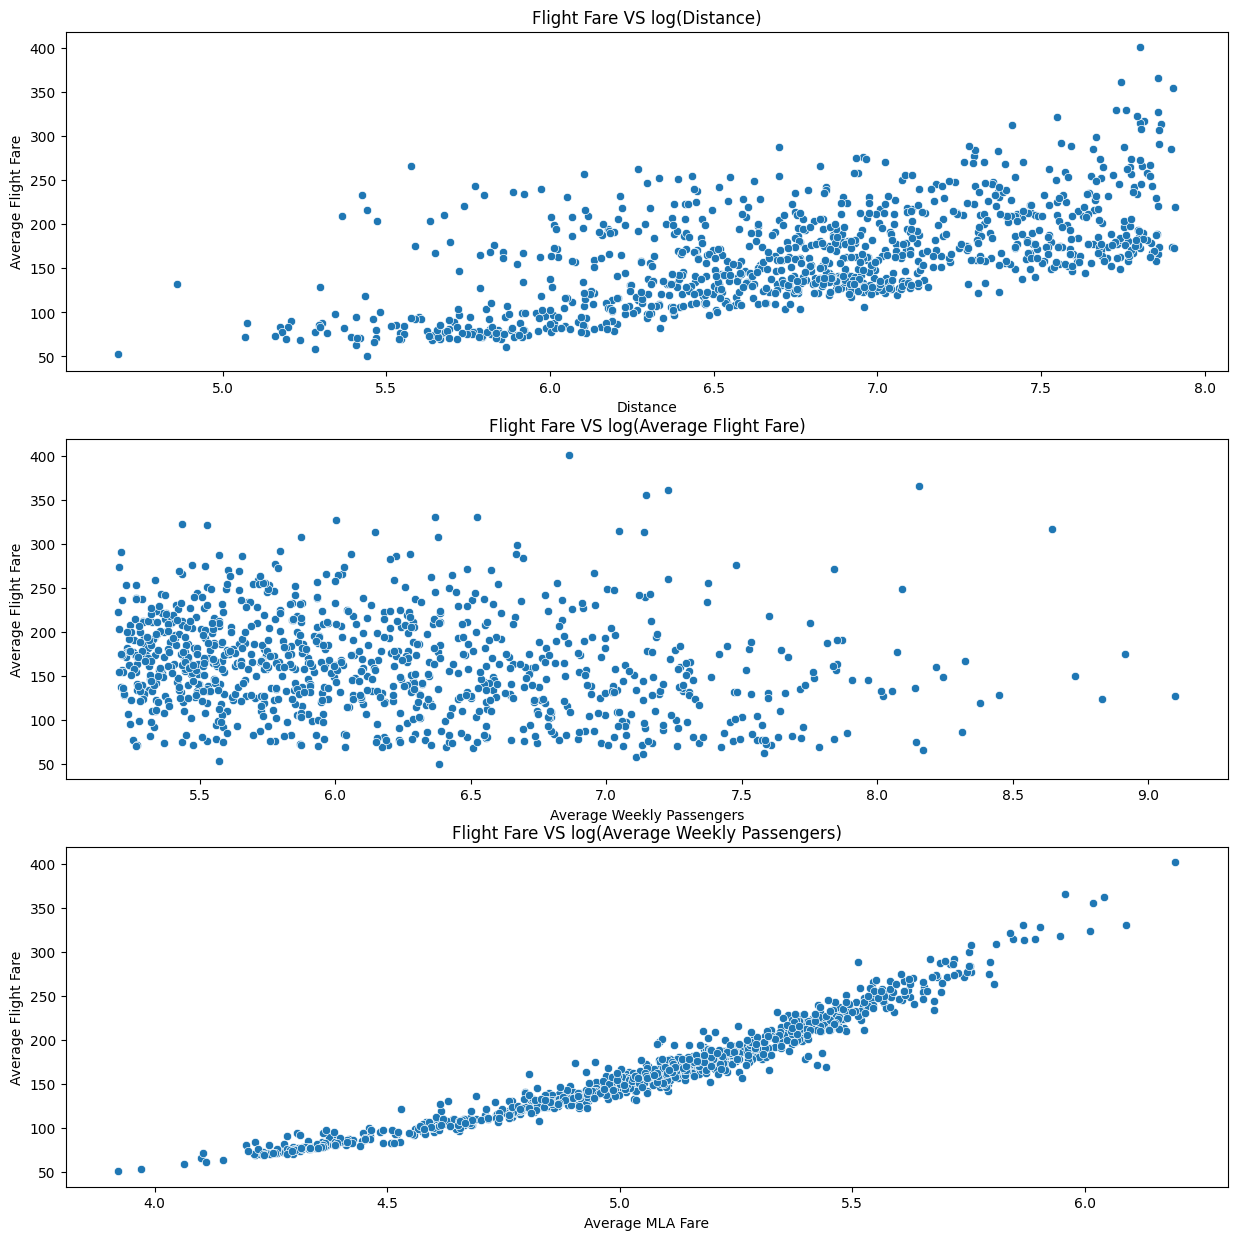

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title('Flight Fare VS log(Distance)')
sns.scatterplot(x=l1,y=df['Average Flight Fare'])

plt.subplot(3,1,2)
plt.title('Flight Fare VS log(Average Flight Fare)')
sns.scatterplot(x=l2,y=df['Average Flight Fare'])

plt.subplot(3,1,3)
plt.title('Flight Fare VS log(Average Weekly Passengers)')
sns.scatterplot(x=l4,y=df['Average Flight Fare'])
plt.show()

# Inference:
    - Given Transformation doesn't seems to be adding much value, so raw data to be used for further analysis

### Q5. Multi Linear Regresiion Model

In [25]:
numcols

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51
996,83.28,200,232.71,99.57,82.55,99.57,82.55
997,159.97,814,843.80,46.19,159.65,13.89,159.02
998,73.57,174,214.45,99.74,73.44,99.74,73.44


#### 5.1 Rescaling the Features

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
numcols=pd.DataFrame(scaler.fit_transform(numcols))

In [28]:
numcols

,0,1,2,3,4,5,6
0,0.182344,0.160550,0.027727,0.637877,0.137676,0.698706,0.181539
1,0.205155,0.287462,0.010882,0.697522,0.165116,0.163432,0.204918
2,0.467338,0.284404,0.003917,0.743562,0.394667,0.017283,0.347324
3,0.053834,0.068807,0.048513,0.963192,0.041728,0.969375,0.056897
4,0.306835,0.235092,0.015010,0.268586,0.252190,0.144330,0.283185
...,...,...,...,...,...,...,...
995,0.244190,0.380734,0.000334,0.190598,0.194080,0.278856,0.203647
996,0.093411,0.035168,0.005850,0.994776,0.072877,0.995654,0.097361
997,0.312081,0.269878,0.075535,0.346331,0.248299,0.129675,0.323382
998,0.065724,0.025229,0.003768,0.996842,0.052149,0.997372,0.070434


In [29]:
numcols.describe()

,0,1,2,3,4,5,6
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.321791,0.362757,0.055976,0.515653,0.264221,0.338503,0.276603
std,0.157867,0.245873,0.087409,0.235274,0.142568,0.273873,0.139595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215149,0.170298,0.008642,0.350219,0.167380,0.122650,0.189630
50%,0.316002,0.310015,0.025472,0.504859,0.252281,0.253487,0.260737
75%,0.418786,0.513953,0.067109,0.678207,0.346881,0.524687,0.351491
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.2 Splitting Data into Train and Test

In [30]:
# Splitting the dataset
np.random.seed(555)
from sklearn.model_selection import train_test_split
train,test=train_test_split(numcols,test_size=0.25,random_state=555)

In [31]:
train.shape

(750, 7)

In [32]:
test.shape

(250, 7)

In [33]:
numcols.head()

,0,1,2,3,4,5,6
0,0.182344,0.160550,0.027727,0.637877,0.137676,0.698706,0.181539
1,0.205155,0.287462,0.010882,0.697522,0.165116,0.163432,0.204918
2,0.467338,0.284404,0.003917,0.743562,0.394667,0.017283,0.347324
3,0.053834,0.068807,0.048513,0.963192,0.041728,0.969375,0.056897
4,0.306835,0.235092,0.015010,0.268586,0.252190,0.144330,0.283185


In [34]:
numcols.columns=scaler.get_feature_names_out()

In [35]:
x_train=numcols.drop(columns='Average Flight Fare')
y_train=numcols[['Average Flight Fare']]

In [36]:
x_test=numcols.drop(columns='Average Flight Fare')
y_test=numcols[['Average Flight Fare']]

In [37]:
print(x_train.shape==x_test.shape)
print(y_train.shape==y_test.shape)

True
True


#### 5.3 Fitting Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [39]:
lr_model=lr.fit(x_train,y_train)

In [40]:
print(lr_model.score(x_train,y_train))
print(lr_model.score(x_test,y_test))

0.9742216704699636
0.9742216704699636


In [41]:
# Model prediction
y_pred=pd.DataFrame(lr.predict(x_train))

In [42]:
pd.concat((y_train,y_pred),axis=1)

,Average Flight Fare,0
0,0.182344,0.182057
1,0.205155,0.224600
2,0.467338,0.461889
3,0.053834,0.068520
4,0.306835,0.311317
...,...,...
995,0.244190,0.242026
996,0.093411,0.105213
997,0.312081,0.316837
998,0.065724,0.081028


### from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [43]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)

NameError: name 'mean_squared_error' is not defined

In [ ]:
print('MSE =',MSE, '\nMAE =',MAE, '\nR2 =',R2)

### Conclusion Drawn:

    Insights from Exploratory Data Analysis(EDA):
        - A significant portion of flight fares is concentrated between 100           to 300, occasionally
         displaying outliers.
        - Distance traveled by flight generally span from 500 to 2500
        - While the average weekly passenger count often remains below               2000, a considerable
         number of outliers are present.
        - Both the Market Leader and Low Price Airline exhibit fare ranges           of 100 to 300, showcasing some outliers.
        - The Market Leader maintains a market share of 40 to 80 percent on           most routes, whereas the Low Price Airline tends to have a market           share below 40 percent on the majority of routes.
        - Most flights display comparable median flight fares, though some           have notably lower values.
        - The flight fares of the leading market airline and the Low Price           airline seem to fall within a similar range.


# Observations from Model Performance Scores:
- The model's performance has significantly improved.
- All the losses are minimized, and the R2 and Adjusted R2 scores approach a value of 1.

In [44]:
df

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [ ]:
df.fillna()